# SECTION A [BATCH 1]
# WEEK 4

# Exercise 2

**Used Resources:**

**1.)https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/**

**2.)https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe**

**3.)https://www.geeksforgeeks.org/how-to-calculate-residual-sum-of-squares-in-python/**

# Download fuel consumption dataset "FuelConsumption.csv", which contains model specific fuel consumption ratings and estimated carbon dioxide emission

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the model. Plot Emission values with respect to Engine size.

In [4]:
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']

Text(0.5, 0, 'Engine Size')

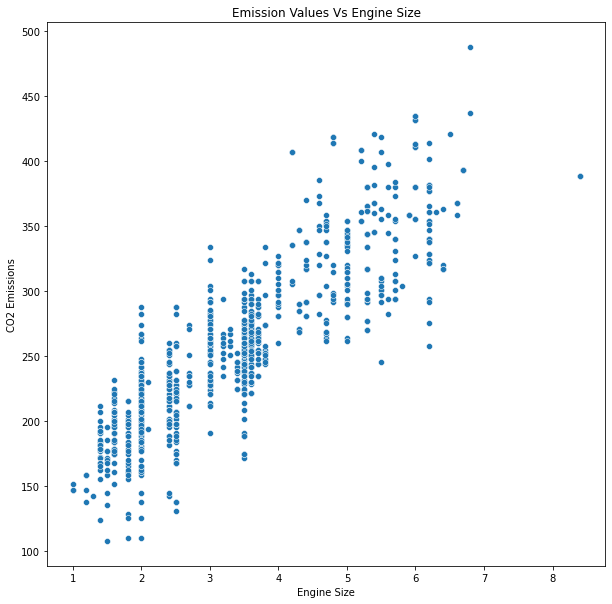

In [5]:
plt.figure(figsize = (10, 10))
plt.title('Emission Values Vs Engine Size')
sb.scatterplot(data = df, x ='ENGINESIZE', y = 'CO2EMISSIONS')
plt.ylabel('CO2 Emissions')
plt.xlabel('Engine Size')

# split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value

In [6]:
x_es = df.iloc[:,4:5].values.reshape(-1, 1)
y_es = df.iloc[:,-1].values.reshape(-1, 1)

In [7]:
x_c = df.iloc[:,5:6].values.reshape(-1, 1)
y_c = df.iloc[:,-1].values.reshape(-1, 1)

In [8]:
x_fcc = df.iloc[:,-3].values.reshape(-1, 1)
y_fcc = df.iloc[:,-1].values.reshape(-1, 1)

In [9]:
x_train_es, x_test_es, y_train_es, y_test_es = train_test_split(x_es, y_es, test_size = 0.3, random_state = 100)

In [10]:
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_c, y_c, test_size = 0.3, random_state = 100)

In [11]:
x_train_fcc, x_test_fcc, y_train_fcc, y_test_fcc = train_test_split(x_fcc, y_es, test_size = 0.3, random_state = 100)

# Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verify the accuracy by calculating Mean absolute error, Residual sum of squares, R2-score and comment on which model is the best

# Feature : ENGINESIZE

In [12]:
best_model_ENGINESIZE_df = pd.DataFrame(columns = ['Degree', 'Feature', 'Residual Sum Of Squares', 'Mean Absolute Error', 'R2-Score'])

In [13]:
def get_mae(y_test, y_predict):
    return mean_absolute_error(y_test, y_predict)

In [14]:
def get_rss(y_test, y_predict):
    return np.sum(np.square(y_test - y_predict))

In [15]:
def get_r2Score(y_test, y_predict):
    return r2_score(y_test, y_predict)

In [16]:
def polynomial_regression(feature, x_train, x_test, y_train, y_test):
    for i in range( 3, 6 ):
        
        poly = PolynomialFeatures(degree = i)
    
        x_poly_train = poly.fit_transform(x_train)
        x_poly_test = poly.fit_transform(x_test)
    
        linreg = LinearRegression()
    
        linreg.fit(x_poly_train, y_train)
        y_predict = linreg.predict(x_poly_test)
        best_model_ENGINESIZE_df.loc[i - 2] = [i, feature, get_mae(y_test, y_predict), get_rss(y_test, y_predict), get_r2Score(y_test, y_predict)]


In [17]:
polynomial_regression('ENGINESIZE', x_train_es, x_test_es, y_train_es, y_test_es)

In [18]:
best_model_ENGINESIZE_df

,Degree,Feature,Residual Sum Of Squares,Mean Absolute Error,R2-Score
1,3,ENGINESIZE,23.064492,282482.261942,0.761402
2,4,ENGINESIZE,23.027137,282467.977666,0.761415
3,5,ENGINESIZE,23.177276,283728.251843,0.760350


# Feature : CYLINDERS

In [19]:
best_model_CYLINDERS_df = pd.DataFrame(columns = ['Degree', 'Feature', 'Residual Sum Of Squares', 'Mean Absolute Error', 'R2-Score'])

In [20]:
def polynomial_regression(feature, x_train, x_test, y_train, y_test):
    for i in range( 3, 6 ):
        
        poly = PolynomialFeatures(degree = i)
    
        x_poly_train = poly.fit_transform(x_train)
        x_poly_test = poly.fit_transform(x_test)
    
        linreg = LinearRegression()
    
        linreg.fit(x_poly_train, y_train)
        y_predict = linreg.predict(x_poly_test)
        best_model_CYLINDERS_df.loc[i - 2] = [i, feature, get_mae(y_test, y_predict), get_rss(y_test, y_predict), get_r2Score(y_test, y_predict)]


In [21]:
polynomial_regression('CYLINDERS', x_train_c, x_test_c, y_train_c, y_test_c)

In [22]:
best_model_CYLINDERS_df

,Degree,Feature,Residual Sum Of Squares,Mean Absolute Error,R2-Score
1,3,CYLINDERS,25.127818,321385.675313,0.728543
2,4,CYLINDERS,25.197724,323026.704655,0.727157
3,5,CYLINDERS,25.263850,323747.915934,0.726548


# Feature : FUELCONSUMPTION_COMB

In [23]:
best_model_FUELCONSUMPTION_COMB_df = pd.DataFrame(columns = ['Degree', 'Feature', 'Residual Sum Of Squares', 'Mean Absolute Error', 'R2-Score'])

In [24]:
def polynomial_regression(feature, x_train, x_test, y_train, y_test):
    for i in range( 3, 6 ):
        
        poly = PolynomialFeatures(degree = i)
    
        x_poly_train = poly.fit_transform(x_train)
        x_poly_test = poly.fit_transform(x_test)
    
        linreg = LinearRegression()
    
        linreg.fit(x_poly_train, y_train)
        y_predict = linreg.predict(x_poly_test)
        best_model_FUELCONSUMPTION_COMB_df.loc[i - 2] = [i, feature, get_mae(y_test, y_predict), get_rss(y_test, y_predict), get_r2Score(y_test, y_predict)]


In [25]:
polynomial_regression('FUELCONSUMPTION_COMB', x_train_fcc, x_test_fcc, y_train_fcc, y_test_fcc)

In [26]:
best_model_FUELCONSUMPTION_COMB_df

,Degree,Feature,Residual Sum Of Squares,Mean Absolute Error,R2-Score
1,3,FUELCONSUMPTION_COMB,12.386401,185233.507685,0.843543
2,4,FUELCONSUMPTION_COMB,10.384293,170806.485923,0.855729
3,5,FUELCONSUMPTION_COMB,10.301025,170734.620413,0.855790
